# EDA Eurocopa 2024 - Jugadores

Luego de la culminación de la Eurocopa 2024, disputada en Alemania, se realizó un análisis de datos de los diversos aspectos del juego. Se trabajó con 9 dataframes distintos que sirvieron para evaluar cómo fue el rendimiento estadístico de los futbolistas que la disputaron. Los datos se obtuvieron del sitio web FBRef, de lo más completo para trabajar con estadísticas bastante avanzadas en el fútbol.

Para realizar el análisis de datos y la visualización, importamos las siguientes librerías:

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

Cargamos múltiples conjuntos de datos desde archivos Excel. Cada archivo contiene datos específicos relacionados con diferentes aspectos del rendimiento de los equipos en la Eurocopa 2024.

In [8]:
creacion = pd.read_excel(r'data\Euro Jugadores\creacion.xlsx')
defensivo = pd.read_excel(r'data\Euro Jugadores\defensivo.xlsx')
estandar = pd.read_excel(r'data\Euro Jugadores\estandar.xlsx')
minutos = pd.read_excel(r'data\Euro Jugadores\minutos.xlsx')
pases = pd.read_excel(r'data\Euro Jugadores\pases.xlsx')
porteros = pd.read_excel(r'data\Euro Jugadores\porteros.xlsx')
posesion = pd.read_excel(r'data\Euro Jugadores\posesion.xlsx')
remates = pd.read_excel(r'data\Euro Jugadores\remates.xlsx')
tipo_pases = pd.read_excel(r'data\Euro Jugadores\tipo_pases.xlsx')

In [9]:
creacion.head()

,RL,Jugador,Posc,Equipo,Edad,Nacimiento,90 s,ACT,SCA90,PassLive,...,FR,Def,ACG,GCA90,PassLive.1,PassDead.1,HASTA.1,Dis.1,FR.1,Def.1
0,1,Che Adams,DL,sct Scotland,27,1996,2.3,2,0.86,1,...,1,0,0,0,0,0,0,0,0,0
1,2,Michel Aebischer,DF,ch Switzerland,27,1997,5.3,9,1.7,9,...,0,0,2,0.38,2,0,0,0,0,0
2,3,Arlind Ajeti,DF,al Albania,30,1993,3,2,0.67,2,...,0,0,0,0,0,0,0,0,0,0
3,4,Manuel Akanji,DF,ch Switzerland,28,1995,5.3,7,1.4,7,...,0,0,2,0.4,2,0,0,0,0,0
4,5,Samet Akaydın,DF,tr Türkiye,29,1994,3.7,4,1.07,4,...,0,0,0,0,0,0,0,0,0,0


In [10]:
defensivo.head()

,RL,Jugador,Posc,Equipo,Edad,Nacimiento,90 s,Tkl,TklG,3.º def.,...,Att,Tkl%,Pérdida,Bloqueos,Dis,Pases,Int,Tkl+Int,Desp.,Err
0,1,Che Adams,DL,sct Scotland,27,1996,2.3,2,1,1,...,1,100,0,2,0,2,1,3,0,0
1,2,Michel Aebischer,DF,ch Switzerland,27,1997,5.3,4,3,2,...,11,9.1,10,3,1,2,2,6,7,0
2,3,Arlind Ajeti,DF,al Albania,30,1993,3,1,0,0,...,3,33.3,2,5,4,1,6,7,13,0
3,4,Manuel Akanji,DF,ch Switzerland,28,1995,5.3,2,2,2,...,2,50,1,6,6,0,4,6,22,0
4,5,Samet Akaydın,DF,tr Türkiye,29,1994,3.7,8,4,8,...,8,75,2,5,5,0,7,15,16,0


In [11]:
estandar.head()

,RL,Jugador,Posc,Equipo,Edad,Nacimiento,PJ,Titular,Mín,90 s,...,Gls._90,Ast_90,G+A_90,G-TP_90,G+A-TP_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
0,1,Che Adams,DL,sct Scotland,27,1996,3,3,209,2.3,...,0.00,0.00,0.00,0.00,0.00,0.05,0.03,0.09,0.05,0.09
1,2,Michel Aebischer,DF,ch Switzerland,27,1997,5,5,476,5.3,...,0.19,0.38,0.57,0.19,0.57,0.02,0.22,0.24,0.02,0.24
2,3,Arlind Ajeti,DF,al Albania,30,1993,3,3,270,3.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,4,Manuel Akanji,DF,ch Switzerland,28,1995,5,5,480,5.3,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,5,Samet Akaydın,DF,tr Türkiye,29,1994,4,4,335,3.7,...,0.27,0.00,0.27,0.27,0.27,0.09,0.00,0.09,0.09,0.09


In [12]:
minutos.head()

,RL,Jugador,Posc,Equipo,Edad,Nacimiento,PJ,Mín,Mn/PJ,% min,...,onG,onGA,+/-,+/-90,Dentro-Fuera,onxG,onxGA,xG+/-,xG+/-90,Dentro-Fuera.1
0,1,Amir Abrashi,CC,al Albania,33,1990,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Che Adams,DL,sct Scotland,27,1996,3,209,70,77.4,...,1,4,-3,-1.29,1.66,0.7,2.8,-2,-0.88,1.23
2,3,Michel Aebischer,DF,ch Switzerland,27,1997,5,476,95,99.2,...,8,4,4,0.76,0.76,6.5,4.9,1.6,0.3,-5.09
3,4,Arlind Ajeti,DF,al Albania,30,1993,3,270,90,100,...,3,5,-2,-0.67,NaN,2.4,5.7,-3.2,-1.07,NaN
4,5,Manuel Akanji,DF,ch Switzerland,28,1995,5,480,96,100,...,8,4,4,0.75,NaN,6.7,4.9,1.8,0.37,0.37


In [13]:
pases.head()

,RL,Jugador,Posc,Equipo,Edad,Nacimiento,90 s,Cmp,Int.,% Cmp,...,% Cmp_largo,Ass,xAG,xA,A-xAG,PC,Pases al último tercio,PPA,CrAP,PrgP
0,1,Che Adams,DL,sct Scotland,27,1996,2.3,27,31,87.1,...,33.3,0,0.1,0.2,-0.1,2,2,0,0,2
1,2,Michel Aebischer,DF,ch Switzerland,27,1997,5.3,221,252,87.7,...,62.5,2,1.2,1,0.8,6,17,7,0,28
2,3,Arlind Ajeti,DF,al Albania,30,1993,3,93,112,83,...,47.1,0,0,0,0,0,4,0,0,5
3,4,Manuel Akanji,DF,ch Switzerland,28,1995,5.3,304,331,91.8,...,79.5,0,0,0.1,0,1,21,0,0,25
4,5,Samet Akaydın,DF,tr Türkiye,29,1994,3.7,185,206,89.8,...,61.9,0,0,0.1,0,0,18,0,0,15


In [14]:
porteros.head()

,RL,Jugador,Posc,Equipo,Edad,Nacimiento,90 s,GC,PD,TL,...,Long. prom._pases,Int..1,%deLanzamientos_meta,Long. prom._meta,Opp,Stp,% de Stp,Núm. de OPA,Núm. de OPA/90,DistProm.
0,1,Altay Bayındır,PO,tr Türkiye,25,1998,1,3,0,0,...,31.2,2,0,7.5,8,2,25,0,0,12.2
1,2,Koen Casteels,PO,be Belgium,31,1992,4,2,0,0,...,27.1,35,34.3,34.7,48,4,8.3,4,1,13.8
2,3,Diogo Costa,PO,pt Portugal,24,1999,5.7,3,1,0,...,27.2,26,3.8,25.6,41,2,4.9,6,1.2,21
3,4,Gianluigi Donnarumma,PO,it Italy,24,1999,4,5,0,0,...,26.3,16,25,27.1,41,3,7.3,2,0.5,10.1
4,5,Martin Dúbravka,PO,sk Slovakia,35,1989,4.3,5,1,0,...,30.1,23,73.9,54.7,57,2,3.5,4,1,11.8


In [15]:
posesion.head()

,RL,Jugador,Posc,Equipo,Edad,Nacimiento,90 s,Toques,Def. pen.,3.º def.,...,Transportes,Dist. tot.,Dist. prg.,PrgC,Ultimo tercio,TAP,Errores de control,Des,Rec,PrgR
0,1,Che Adams,DL,sct Scotland,27,1996,2.3,51,0,4,...,34,211,84,3,3,0,7,4,36,10
1,2,Michel Aebischer,DF,ch Switzerland,27,1997,5.3,288,11,57,...,178,671,271,4,8,1,5,1,197,18
2,3,Arlind Ajeti,DF,al Albania,30,1993,3,135,30,84,...,76,271,121,1,1,0,0,0,89,0
3,4,Manuel Akanji,DF,ch Switzerland,28,1995,5.3,365,70,177,...,234,1338,821,2,4,0,1,0,238,1
4,5,Samet Akaydın,DF,tr Türkiye,29,1994,3.7,248,27,110,...,139,861,461,1,1,0,2,1,168,0


In [16]:
remates.head()

,RL,Jugador,Posc,Equipo,Edad,Nacimiento,90 s,Gls.,Dis,DaP,...,G/TalArc,Dist,FK,TP,TPint,xG_90,npxG_90,npxG/Sh_90,G-xG_90,np:G-xG_90
0,1,Che Adams,DL,sct Scotland,27,1996,2.3,0,2,1,...,0,14.1,0,0,0,0.1,0.1,0.06,-0.1,-0.1
1,2,Michel Aebischer,DF,ch Switzerland,27,1997,5.3,1,2,1,...,1,21.7,0,0,0,0.1,0.1,0.05,0.9,0.9
2,3,Arlind Ajeti,DF,al Albania,30,1993,3,0,0,0,...,NaN,NaN,0,0,0,0,0,NaN,0,0
3,4,Manuel Akanji,DF,ch Switzerland,28,1995,5.3,0,0,0,...,NaN,NaN,0,0,0,0,0,NaN,0,0
4,5,Samet Akaydın,DF,tr Türkiye,29,1994,3.7,1,2,1,...,1,5.2,0,0,0,0.4,0.4,0.18,0.6,0.6


In [17]:
tipo_pases.head()

,RL,Jugador,Posc,Equipo,Edad,Nacimiento,90 s,Int.,Balón vivo,Balón muerto,...,Camb.,Pcz,Lanz.,SE,Dentro,Fuera,Rect.,Cmp,PA,Bloqueos
0,1,Che Adams,DL,sct Scotland,27,1996,2.3,31,28,3,...,1,1,0,0,0,0,0,27,0,0
1,2,Michel Aebischer,DF,ch Switzerland,27,1997,5.3,252,219,32,...,2,3,28,0,0,0,0,221,1,0
2,3,Arlind Ajeti,DF,al Albania,30,1993,3,112,105,6,...,1,0,0,0,0,0,0,93,1,2
3,4,Manuel Akanji,DF,ch Switzerland,28,1995,5.3,331,304,26,...,0,0,0,0,0,0,0,304,1,2
4,5,Samet Akaydın,DF,tr Türkiye,29,1994,3.7,206,197,9,...,0,0,0,0,0,0,0,185,0,0


Para facilitar el análisis y la manipulación de los datos, establecemos la columna `'RL'` como el índice para cada uno de los DataFrames cargados. Esto nos permite acceder a las filas mediante un identificador único.

In [18]:
creacion.set_index('RL', inplace=True)
defensivo.set_index('RL', inplace=True)
estandar.set_index('RL', inplace=True)
minutos.set_index('RL', inplace=True)
pases.set_index('RL', inplace=True)
porteros.set_index('RL', inplace=True)
posesion.set_index('RL', inplace=True)
remates.set_index('RL', inplace=True)
tipo_pases.set_index('RL', inplace=True)

A continuación, definimos una función para limpiar los DataFrames eliminando filas que contienen el nombre de una columna específica, generalmente utilizada como encabezado duplicado.

In [19]:
def limpiar_dataframe(df, columna='Jugador'):
    df_limpio = df[df[columna] != columna]
    
    
    return df_limpio

In [20]:
#Limpiar todas las columnas de filas que poseían las columnas de encabezado

creacion = limpiar_dataframe(creacion)
defensivo = limpiar_dataframe(defensivo)
estandar = limpiar_dataframe(estandar)
minutos = limpiar_dataframe(minutos)
pases = limpiar_dataframe(pases)
porteros = limpiar_dataframe(porteros)
posesion = limpiar_dataframe(posesion)
remates = limpiar_dataframe(remates)
tipo_pases = limpiar_dataframe(tipo_pases)

Creamos una lista de DataFrames para utilizarlas en diferentes funciones.

In [21]:
lista_dataframes = [creacion, defensivo, estandar, minutos, pases, porteros, posesion, remates, tipo_pases]

Iteramos sobre una lista de DataFrames y modificamos los nombres de las columnas repetidas para asegurar que cada columna tenga un nombre único. Esto es especialmente útil cuando se combinan o se manejan múltiples conjuntos de datos que pueden tener nombres de columnas duplicados. En este caso, se mezclaban las variables que contabilizaban la totalidad de las acciones con el promedio por partido.

In [22]:
for i, df in enumerate(lista_dataframes):

    # Cambiar nombres de columnas repetidas
    col_count = {}
    new_columns = []

    for col in df.columns:
        if col in col_count:
            col_count[col] += 1
            new_columns.append(f'{col}_{col_count[col]}')
        else:
            col_count[col] = 0
            new_columns.append(col)

    df.columns = new_columns

Generamos la función `split_equipos`, que se utiliza para eliminar las abreviaturas y mantener solo los nombres completos de los equipos en una columna específica de un DataFrame. Por ejemplo, convierte "fr France" en "France".

In [23]:
def split_equipos(df, columna):
    # Aplicar la operación sobre cada fila de la columna
    df[columna] = df[columna].apply(lambda x: x.split(maxsplit=1)[1] if isinstance(x, str) else x)
    return df

In [24]:
split_equipos(creacion, 'Equipo')
split_equipos(defensivo, 'Equipo')
split_equipos(estandar, 'Equipo')
split_equipos(minutos, 'Equipo')
split_equipos(pases, 'Equipo')
split_equipos(porteros, 'Equipo')
split_equipos(posesion, 'Equipo')
split_equipos(remates, 'Equipo')
split_equipos(tipo_pases, 'Equipo')

,Jugador,Posc,Equipo,Edad,Nacimiento,90 s,Int.,Balón vivo,Balón muerto,FK,...,Camb.,Pcz,Lanz.,SE,Dentro,Fuera,Rect.,Cmp,PA,Bloqueos
RL,,,,,,,,,,,,,,,,,,,,,
1,Che Adams,DL,Scotland,27,1996,2.3,31,28,3,0,...,1,1,0,0,0,0,0,27,0,0
2,Michel Aebischer,DF,Switzerland,27,1997,5.3,252,219,32,4,...,2,3,28,0,0,0,0,221,1,0
3,Arlind Ajeti,DF,Albania,30,1993,3,112,105,6,6,...,1,0,0,0,0,0,0,93,1,2
4,Manuel Akanji,DF,Switzerland,28,1995,5.3,331,304,26,11,...,0,0,0,0,0,0,0,304,1,2
5,Samet Akaydın,DF,Türkiye,29,1994,3.7,206,197,9,6,...,0,0,0,0,0,0,0,185,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,Andrija Živković,DF,Serbia,27,1996,2.7,142,122,20,0,...,2,13,20,0,0,0,0,115,0,6
490,Budu Zivzivadze,"DL,CC",Georgia,29,1994,0.2,3,3,0,0,...,0,0,0,0,0,0,0,3,0,0
491,Steven Zuber,CC,Switzerland,32,1991,0.9,35,35,0,0,...,1,1,0,0,0,0,0,32,0,2


Para trabajar con datos específicos, seleccionamos las columnas relevantes de cada DataFrame y, si es necesario, modificamos los nombres de las columnas para que sean consistentes y descriptivos. Las columnas tenían ciertas abreviaturas que no podían ser interpretadas claramente.

In [25]:
#Elegir las columnas de cada dataframe con las que voy a trabajar y modificar -de ser necesario- las columnas

dataframes_dict = {
    'creacion': creacion,
    'defensivo': defensivo,
    'estandar': estandar,
    'minutos': minutos,
    'pases': pases,
    'porteros': porteros,
    'posesion': posesion,
    'remates': remates,
    'tipo_pases': tipo_pases
}

lista_columnas_df = [['Jugador', 'Posc', 'Edad', 'Equipo', '90 s', 'ACT', 'SCA90', 'ACG', 'GCA90'],
                     ['Jugador', 'Posc', 'Edad', 'Equipo', '90 s', 'Int', 'Tkl+Int', 'Desp.', 'Err'],
                     ['Jugador', 'Posc', 'Edad', 'Equipo', 'Edad', 'Gls._90', 'Ass', 'G+A_90', 'xG_90', 'xAG_90', 'xG+xAG_90'],
                     ['Jugador', 'Posc', 'Edad', 'Equipo', 'Edad', 'PJ', 'Mín', 'Mn/PJ', '% min', '90 s'],
                     ['Jugador', 'Posc', 'Edad', 'Equipo', '90 s', 'Cmp', 'Int.', '% Cmp', 'Dist. tot.','Dist. prg.',
                      'PC', 'Pases al último tercio', 'PPA', 'PrgP'],
                      ['Jugador', 'Posc', 'Edad', 'Equipo', '90 s', 'GC', 'PSxG/SoT', '/90', '% de Stp'],
                      ['Jugador', 'Posc', 'Edad', 'Equipo', '90 s',  'Toques', '3.º ataq.', 'Transportes', 'Dist. tot.', 'Dist. prg.',
                       'Ultimo tercio'],
                       ['Jugador', 'Posc', 'Edad', 'Equipo', '90 s', 'Gls.', 'Dis', 'DaP', '% de TT', 'T/90', 'TalArc/90', 'G/T', 
                         'G/TalArc', 'Dist'],
                         ['Jugador', 'Posc', 'Edad', 'Equipo', '90 s', 'Int.', 'Balón vivo', 'Balón muerto', 'Cmp', 'Bloqueos']]



nombres_columnas = [['Jugador', 'Posición', 'Edad', 'Equipo', 'Min / 90', 'Acción para creación de tiros', 
                     'Pases que acaban en un tiro / 90', 'Acción para generar un gol', 'Pases que acaban en gol / 90'],
                     ['Jugador', 'Posición', 'Edad', 'Equipo', 'Min / 90', 'Intercepciones', 'Tackles + Intercepciones',
                      'Despejes', 'Errores'],
                      ['Jugador', 'Posición', 'Edad', 'Equipo', 'Min / 90', 'Posesión', 'Goles/90', 'Asistencias/90',
                       'G+A/90', 'xG/90', 'xAG/90'],
                       ['Jugador', 'Posición', 'Edad', 'Equipo', 'Edad', 'PJ', 'Mín', 'Mín/PJ', '% Mín', 'Min / 90'],
                       ['Jugador', 'Posición', 'Edad', 'Equipo', 'Min / 90', 'Completados', 'Intentados', '% Completados',
                        'Dist. total', 'Distancia en pases progresivos', 'Pases Clave', 'Último Tercio', 'Al área penal', 'Pases Progresivos'],
                        ['Jugador', 'Posición', 'Edad', 'Equipo', 'Min / 90', 'GC', 'PSxG/SoT', 'PSxG/SoT / 90', '% centros descolgados'],
                        ['Jugador', 'Posición', 'Edad', 'Equipo', 'Min / 90',  'Toques', 'Toques en último tercio',
                         'Transportes', 'Distancia total', 'Distancia progresada', 'Transportes al último tercio'],
                         ['Jugador', 'Posición', 'Edad', 'Equipo', 'Min / 90', 'Goles', 'Disparos', 'DaP', '% de TT', 'T/90', 'TalArc/90', 'G/T', 
                         'G/TalArc', 'Distancia promedio de remates'],
                         ['Jugador', 'Posición', 'Edad', 'Equipo', 'Min / 90', 'Intentados', 'En movimiento', 'En pelota detenida',
                          'Completados', 'Pases Bloqueados']]

El siguiente bloque de código itera sobre un diccionario de DataFrames, una lista de columnas a mantener y una lista de nuevos nombres de columnas. El objetivo es filtrar las columnas necesarias, renombrarlas, y actualizar tanto el diccionario de DataFrames como las variables globales correspondientes.

In [26]:
# Iterar sobre el diccionario y listas para modificar dataframes in-place
for (df_name, df), columns_to_keep, new_columns in zip(dataframes_dict.items(), lista_columnas_df, nombres_columnas):
    filtered_df = df[columns_to_keep].copy()
    filtered_df.columns = new_columns
    dataframes_dict[df_name] = filtered_df  # Actualizar el diccionario
    globals()[df_name] = filtered_df  # Actualizar la variable global

Actualizamos la lista de DataFrames y generamos una variable 'lista_variables_df' para que contenga los nombres de los DataFrames para utilizarlos en cada impresión dentro de una iteración.

In [27]:
#Actualizar la lista de df para utilizarlas en diferentes funciones

lista_dataframes = [creacion, defensivo, estandar, minutos, pases, porteros, posesion, remates, tipo_pases]

lista_variables_df = ['Creación', 'Defensivo', 'Estándar', 'Minutos',
                      'Pases', 'Porteros', 'Posesión', 'Remates', 'Tipos de Pases']

Iteramos sobre una lista de DataFrames (`lista_dataframes`) y mostramos la información de cada uno utilizando el método `info()`. Este método proporciona una visión general de los DataFrames, incluyendo el número de entradas, nombres y tipos de columnas, y la cantidad de valores no nulos.

In [28]:
# Info de cada uno de los dataframes

for df in lista_dataframes:
    df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 493 entries, 1 to 493
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Jugador                           493 non-null    object
 1   Posición                          493 non-null    object
 2   Edad                              493 non-null    object
 3   Equipo                            493 non-null    object
 4   Min / 90                          493 non-null    object
 5   Acción para creación de tiros     493 non-null    object
 6   Pases que acaban en un tiro / 90  491 non-null    object
 7   Acción para generar un gol        493 non-null    object
 8   Pases que acaban en gol / 90      491 non-null    object
dtypes: object(9)
memory usage: 38.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 493 entries, 1 to 493
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------              

Iteramos sobre una lista de DataFrames (`lista_dataframes`) y mostramos un resumen estadístico de cada uno utilizando el método `describe()`. Este método proporciona estadísticas descriptivas para las columnas numéricas, como la media, desviación estándar, valores mínimos y máximos.

In [29]:
#Analizar cada dataframe
for i, df in enumerate(lista_dataframes):
    print(f'Dataframe: {lista_variables_df[i]}\n', df.describe(), '\n')

Dataframe: Creación
           Jugador Posición  Edad Equipo  Min / 90  \
count         493      493   493    493       493   
unique        493       10    23     24        66   
top     Che Adams       DF    27  Spain         3   
freq            1      147    47     25        36   

        Acción para creación de tiros  Pases que acaban en un tiro / 90  \
count                             493                               491   
unique                             29                               231   
top                                 0                                 0   
freq                              103                               102   

        Acción para generar un gol  Pases que acaban en gol / 90  
count                          493                           491  
unique                           6                            72  
top                              0                             0  
freq                           368                           366   



El siguiente código realiza dos tareas para analizar los datos nulos en los DataFrames:

1. **Corroborar Datos Nulos:**
   - Imprime la cantidad de datos nulos en cada columna de cada DataFrame.
   
2. **Visualizar Datos Nulos con un Heatmap:**
   - Genera un heatmap que visualiza los datos nulos en cada DataFrame para una evaluación gráfica.

In [30]:
#Corroborar en cada dataframe si hay datos nulos

for i, df in enumerate(lista_dataframes):
    print(f'Dataframe: {lista_variables_df[i]}\n', df.isna().sum(), '\n')

Dataframe: Creación
 Jugador                             0
Posición                            0
Edad                                0
Equipo                              0
Min / 90                            0
Acción para creación de tiros       0
Pases que acaban en un tiro / 90    2
Acción para generar un gol          0
Pases que acaban en gol / 90        2
dtype: int64 

Dataframe: Defensivo
 Jugador                     0
Posición                    0
Edad                        0
Equipo                      0
Min / 90                    0
Intercepciones              0
Tackles + Intercepciones    0
Despejes                    0
Errores                     0
dtype: int64 

Dataframe: Estándar
 Jugador           0
Posición          0
Edad              0
Equipo            0
Min / 90          0
Posesión          0
Goles/90          0
Asistencias/90    0
G+A/90            2
xG/90             2
xAG/90            2
dtype: int64 

Dataframe: Minutos
 Jugador       0
Posición      0
Edad   

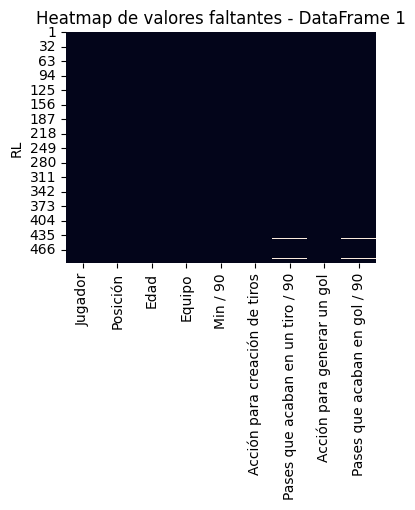

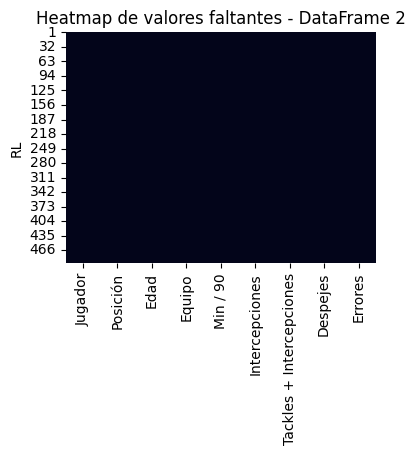

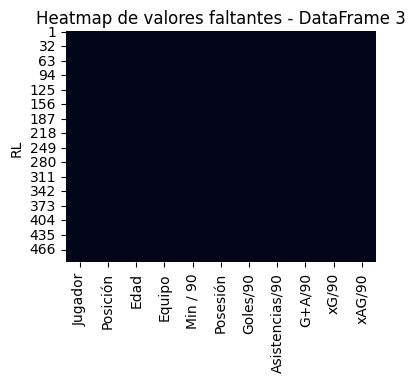

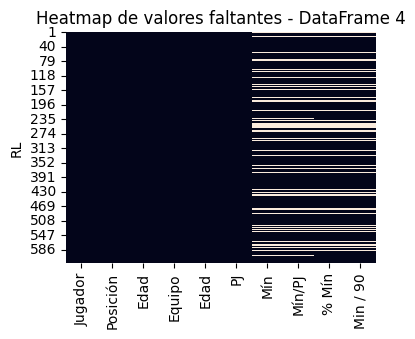

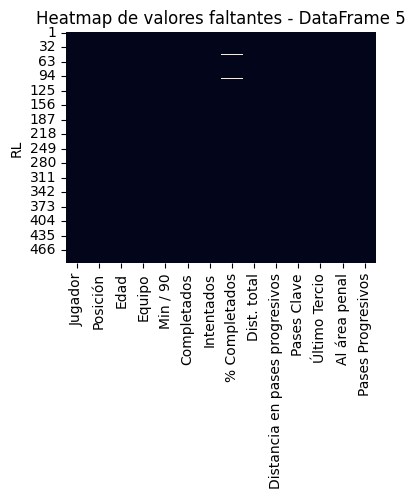

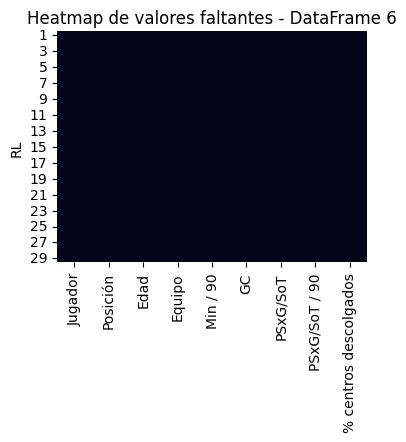

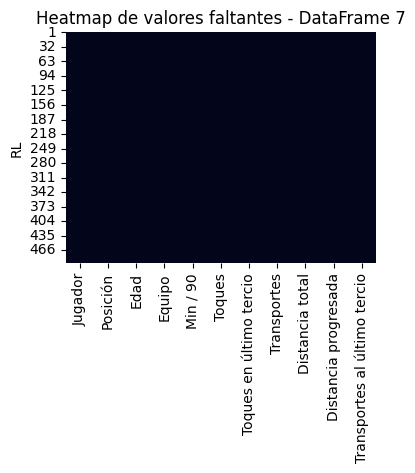

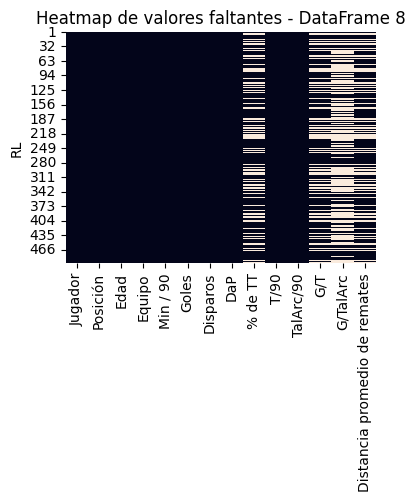

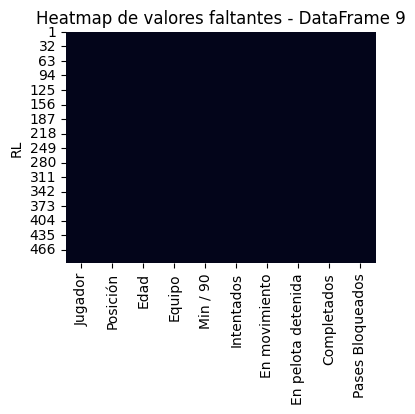

In [31]:
#Corroborar si hay datos nulos con un heatmap

for i, df in enumerate(lista_dataframes):
    plt.figure(figsize=(4, 3))  # Crear una nueva figura para cada heatmap
    sns.heatmap(df.isna(), cbar=False)
    plt.title(f'Heatmap de valores faltantes - DataFrame {i+1}')
    plt.show()

Reemplazamos todos los valores nulos en cada DataFrame con el valor `0`. Esto asegura que no haya valores nulos en los DataFrames antes de realizar análisis adicionales.

In [32]:
#Reemplazar nulos

creacion = creacion.fillna(0)
defensivo = defensivo.fillna(0)
estandar = estandar.fillna(0)
minutos = minutos.fillna(0)
pases = pases.fillna(0)
porteros = porteros.fillna(0)
posesion = posesion.fillna(0)
remates = remates.fillna(0)
tipo_pases = tipo_pases.fillna(0)

C:\Users\Compaq\AppData\Local\Temp\ipykernel_3348\1825287626.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  creacion = creacion.fillna(0)
C:\Users\Compaq\AppData\Local\Temp\ipykernel_3348\1825287626.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  defensivo = defensivo.fillna(0)
C:\Users\Compaq\AppData\Local\Temp\ipykernel_3348\1825287626.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior,

Actualizamos por última vez la lista de los DataFrames para que ya se trabaje con las visualizaciones.

In [33]:
lista_dataframes = [creacion, defensivo, estandar, minutos, pases, porteros, posesion, remates, tipo_pases]

La siguiente función filtra los jugadores que tienen más de un promedio de minutos específico en el campo, y luego selecciona los 10 mejores jugadores basándose en una columna determinada. 

In [34]:
#Top 10, filtrando por jugadores con más de 2 partidos en promedio de minutos

def top_10_df(df, column, min_threshold=2):
    # Filtrar las filas donde 'Mín' es mayor a min_threshold
    filtered_df = df[df['Min / 90'] > min_threshold]
    
    # Seleccionar las columnas 'Jugador' y la columna específica, ordenar y obtener el top 5
    top_10 = filtered_df[['Jugador', column]].sort_values(by=column, ascending=False).head(10)
    
    return top_10

La siguiente función genera gráficos de barras para las columnas de un DataFrame, mostrando los 10 mejores resultados de cada columna especificada en la lista. Los gráficos son creados utilizando Plotly Express.

In [35]:
def barplot_df(df, list_columns):
    # Iterar sobre las columnas y obtener el top 10 de cada una
    top_10_results_df = {}
    for column in df.columns:
        if column != 'Jugador':  # Evitar la columna 'Jugador'
            top_10_results_df[column] = top_10_df(df, column)

    lista_graficos_estandar = list_columns
    for i in lista_graficos_estandar:
        if i in top_10_results_df:
            top_10_column = top_10_results_df[i]
            
            # Crear el gráfico de barras
            fig = px.bar(top_10_column, x=i, y='Jugador', orientation='h', title=f'Top 10 {i}',
                        labels={i: i, 'Jugador': 'Jugador'}, color=i, color_continuous_scale='Viridis')
            fig.show()
        else:
            print(f"La clave {i} no se encuentra en los resultados.")

Definimos los DataFrames y las listas de columnas para las cuales se generarán gráficos de barras. Los DataFrames están organizados en un diccionario, y cada lista de columnas específica se asigna a un DataFrame correspondiente.

In [36]:
#Dataframes y listas de columnas a graficar
dataframes_dict = {
    'creacion': creacion,
    'defensivo': defensivo,
    'estandar': estandar,
    'minutos': minutos,
    'pases': pases,
    'porteros': porteros,
    'posesion': posesion,
    'remates': remates,
    'tipo_pases': tipo_pases
}
lista_columnas = {'creacion': ['Acción para creación de tiros', 'Pases que acaban en un tiro / 90', 
                               'Acción para generar un gol', 'Pases que acaban en gol / 90'],
                               'defensivo': ['Intercepciones','Tackles + Intercepciones', 'Despejes', 'Errores'],
                               'estandar': ['G+A/90', 'xG/90', 'xAG/90'],
                               'pases': ['Pases Clave', 'Último Tercio', 'Pases Progresivos'], 
                               'porteros': ['PSxG/SoT / 90', '% centros descolgados'],
                               'posesion': ['Toques en último tercio', 'Transportes', 'Distancia total','Transportes al último tercio'], 
                               'remates': ['% de TT', 'T/90', 'TalArc/90', 'G/T', 'G/TalArc']}

La siguiente sección muestra cómo iterar sobre el diccionario de DataFrames y listas de columnas para aplicar la función `barplot_df` a cada DataFrame. Esta función generará gráficos de barras para las columnas especificadas.

In [37]:
# Iterar sobre el diccionario y aplicar la función
for df_name, columns in lista_columnas.items():
    if df_name in dataframes_dict:
        df = dataframes_dict[df_name]
        print(f'\nDATAFRAME: {df_name}')
        barplot_df(df, columns)
    else:
        print(f"El DataFrame '{df_name}' no se encuentra en dataframes_dict.")


DATAFRAME: creacion



DATAFRAME: defensivo



DATAFRAME: estandar



DATAFRAME: pases



DATAFRAME: porteros



DATAFRAME: posesion



DATAFRAME: remates


La siguiente función genera un gráfico de dispersión (`scatter plot`) utilizando Plotly Express. Este gráfico visualiza la relación entre dos variables y etiqueta los puntos con los nombres de los jugadores.

In [38]:
# Función para generar gráfico scatter con Plotly
def generar_scatter(data, x, y):
    fig = px.scatter(
        data,
        x=x,
        y=y,
        text='Jugador',  # Usar 'Equipo' para las etiquetas de los puntos
        title=f'{x} vs {y}',
        labels={x: x, y: y}
    )

    # Personalizar el gráfico
    fig.update_traces(marker=dict(size=12, color='blue', opacity=0.7),  textposition='top center', selector=dict(mode='markers+text'))
    fig.update_layout(
        xaxis_title=x,
        yaxis_title=y,
        showlegend=False  # No mostrar la leyenda
    )

    # Mostrar el gráfico
    fig.show()

Como ejemplo, utilizamos un gráfico de dispersión sobre dos variables que afectan a los porteros.

In [39]:
#Generar algunos scatter para los arqueros
generar_scatter(porteros, x='PSxG/SoT', y='PSxG/SoT / 90')

Calculamos y visualizamos la matriz de correlación de cada DataFrame utilizando un heatmap. La correlación entre variables numéricas es visualizada para entender las relaciones entre diferentes métricas.

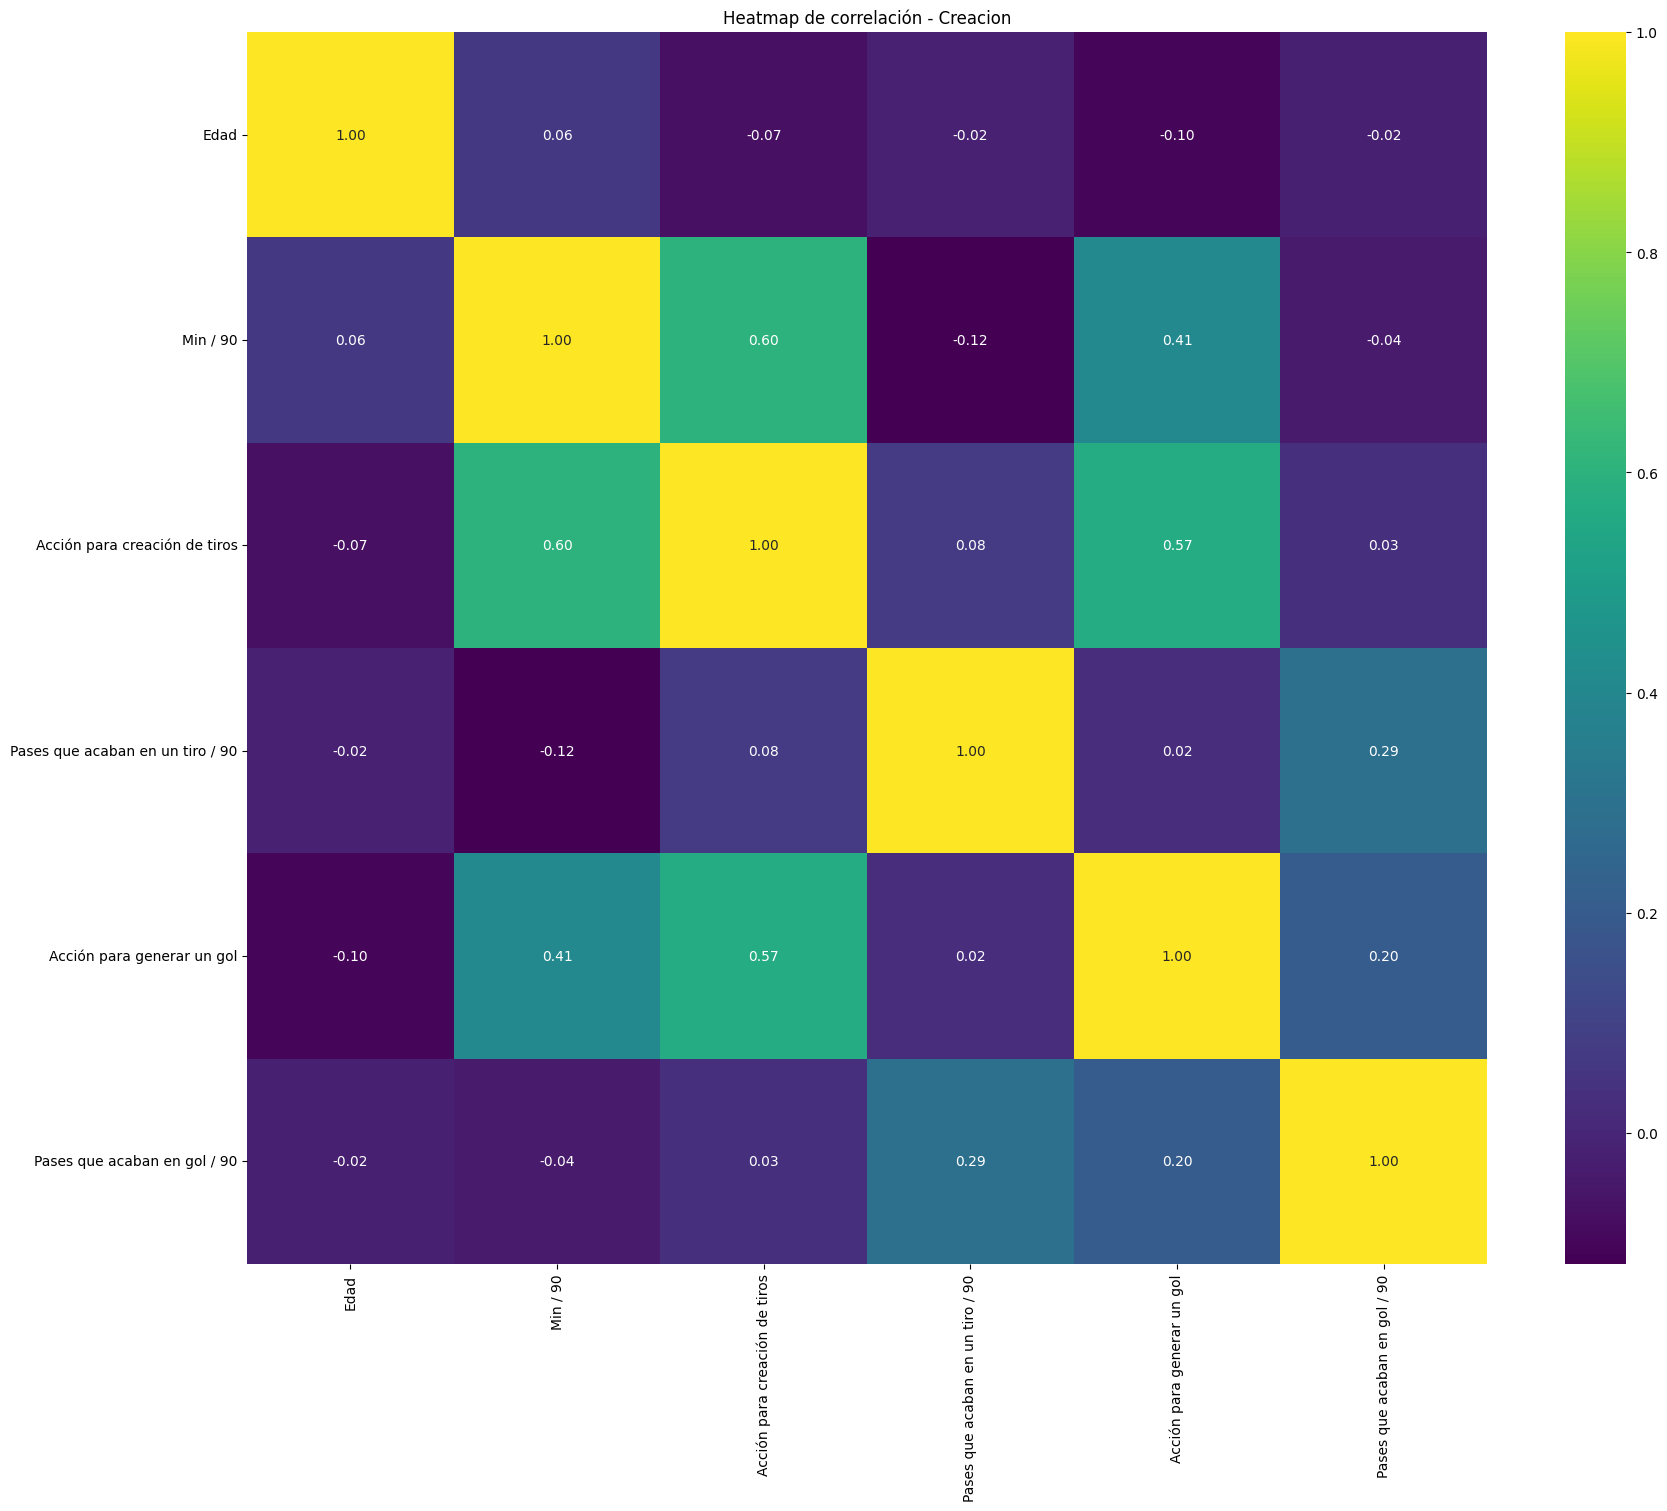

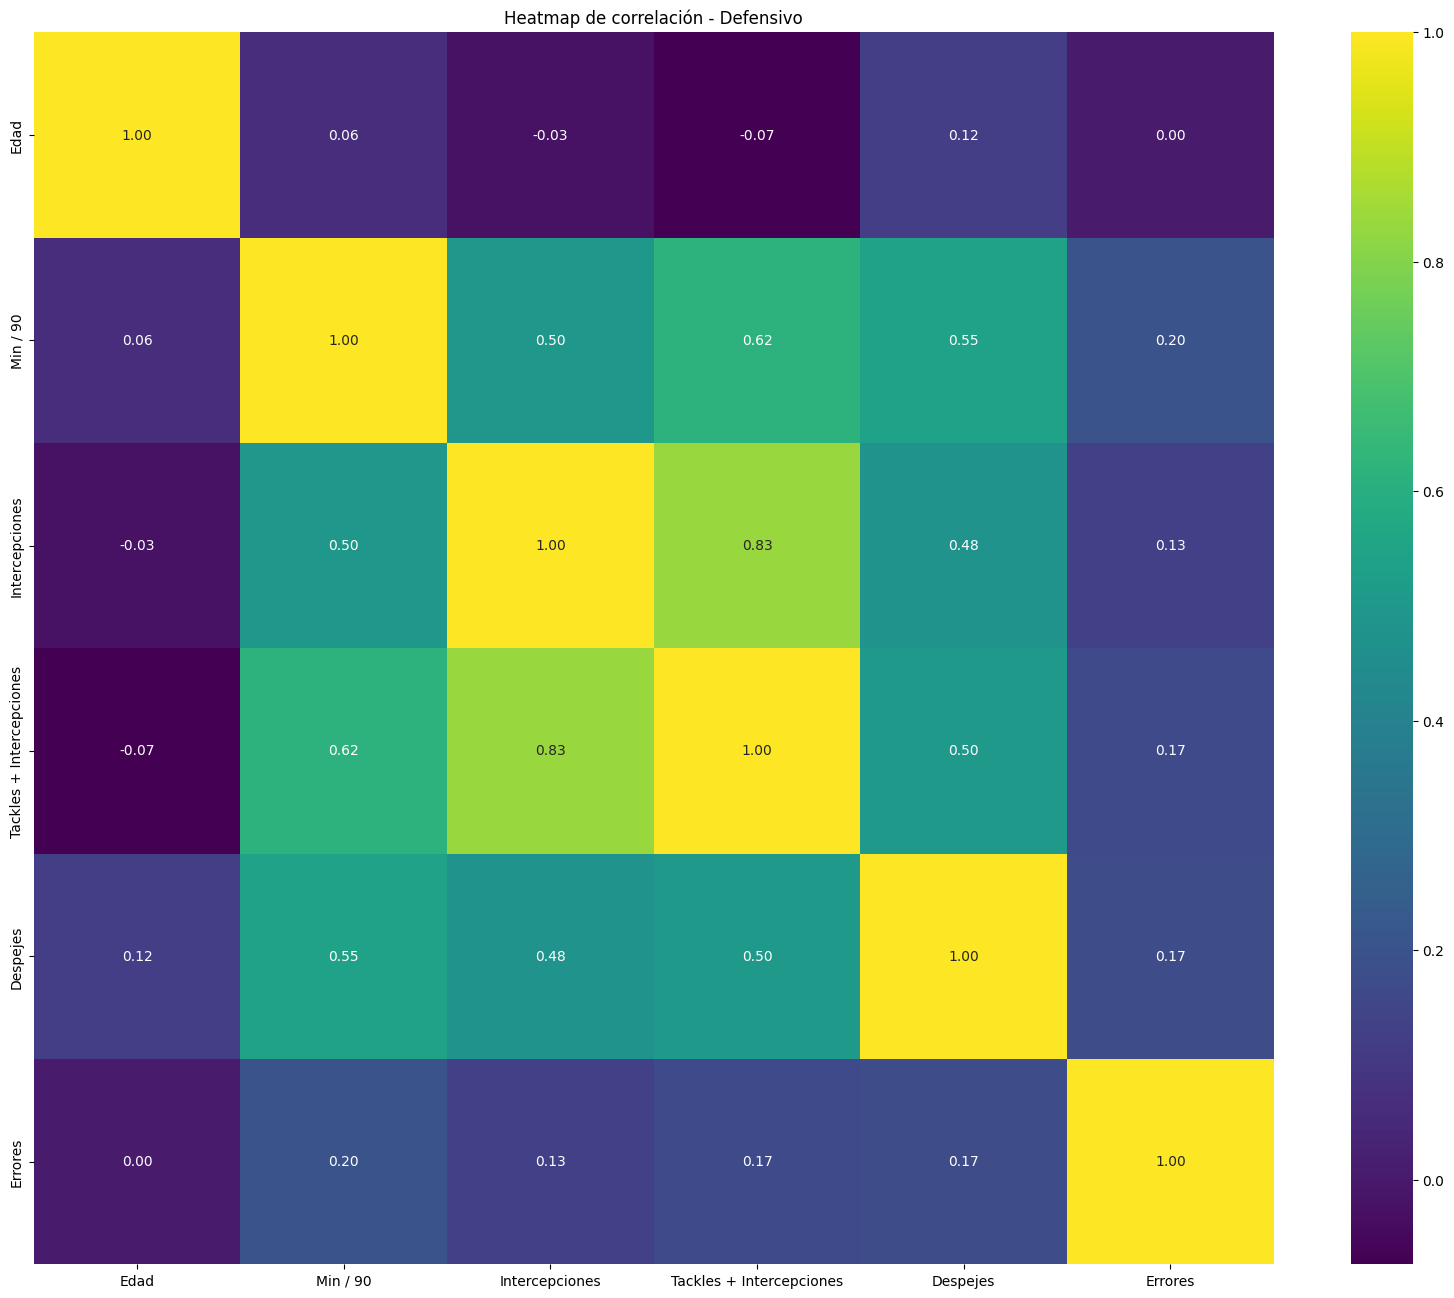

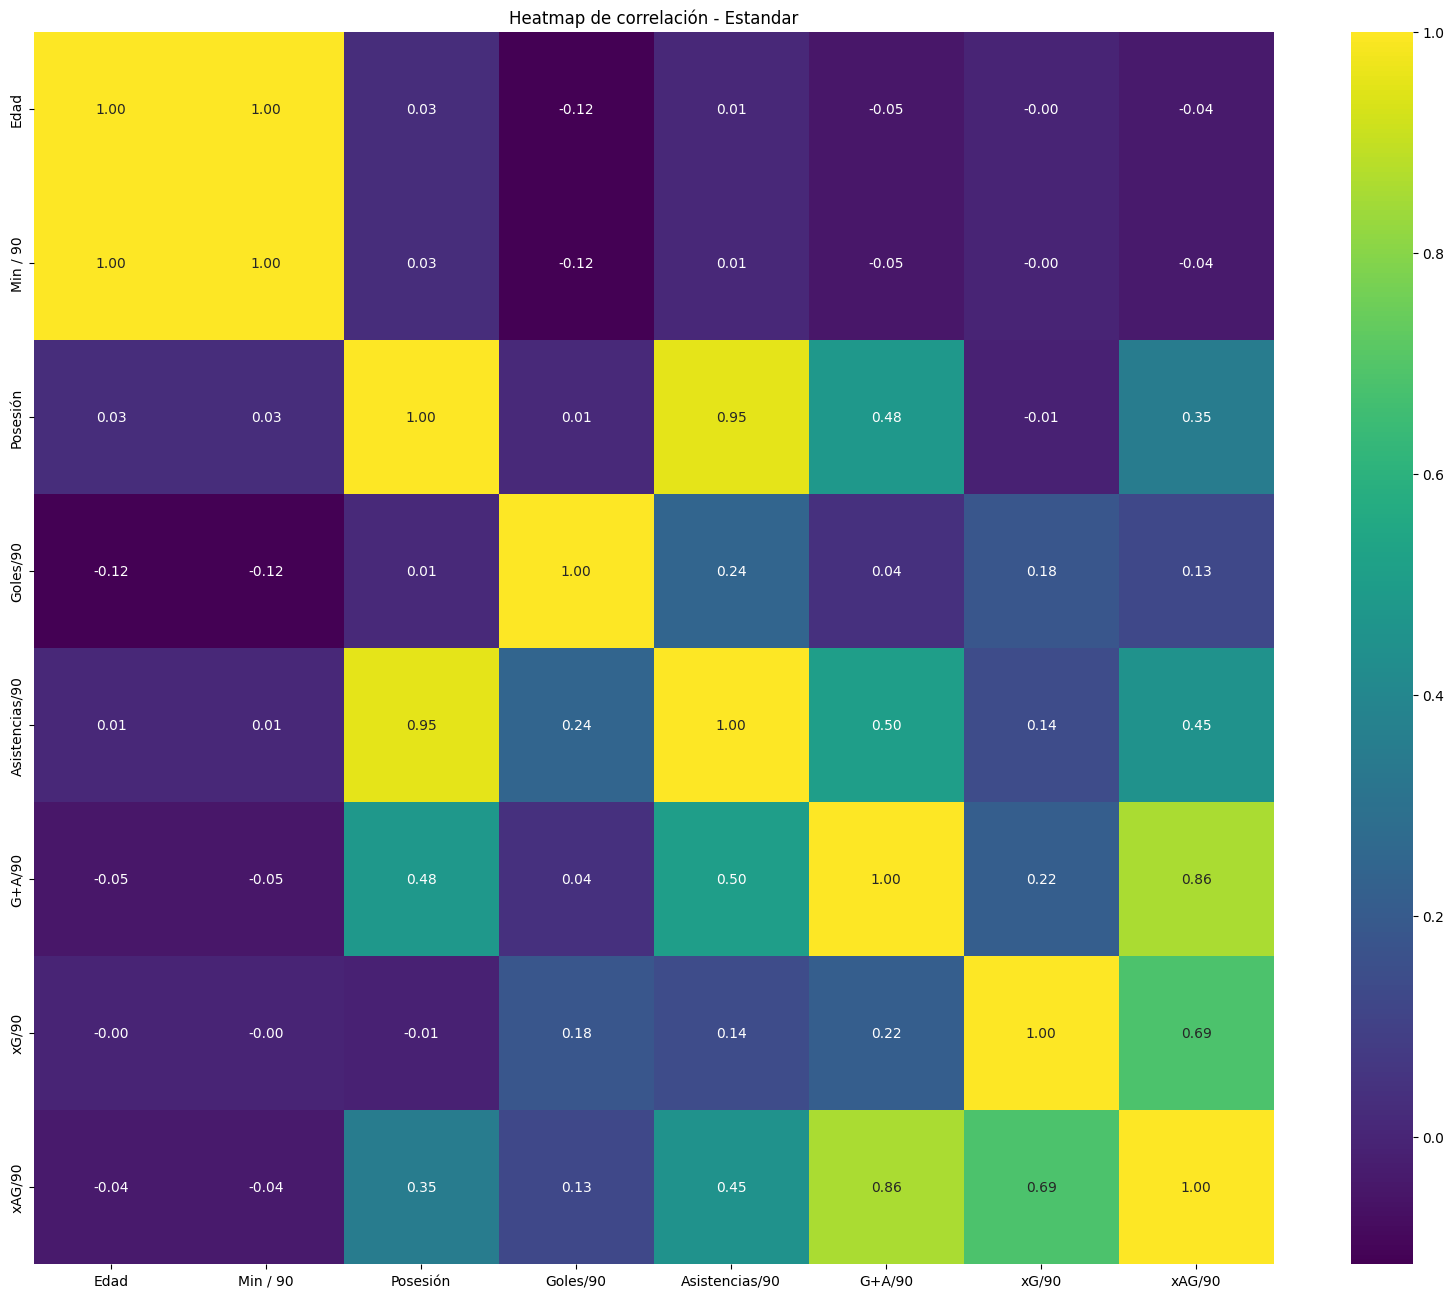

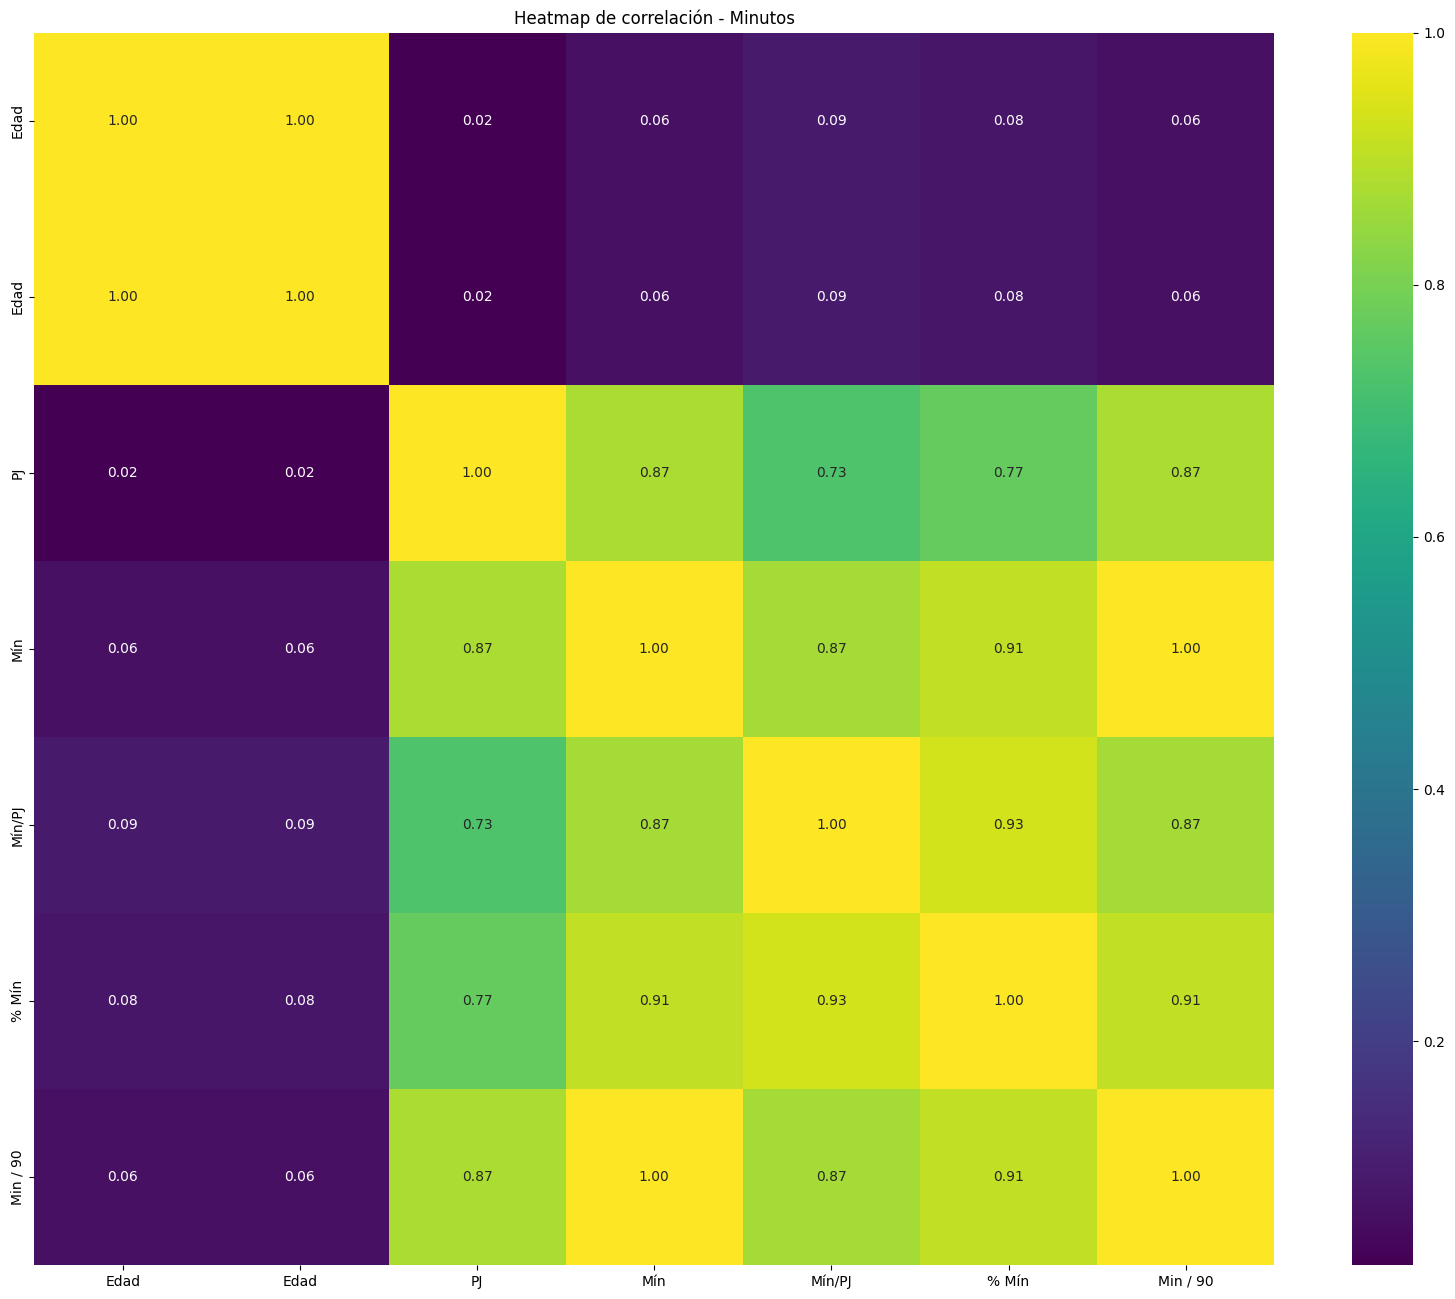

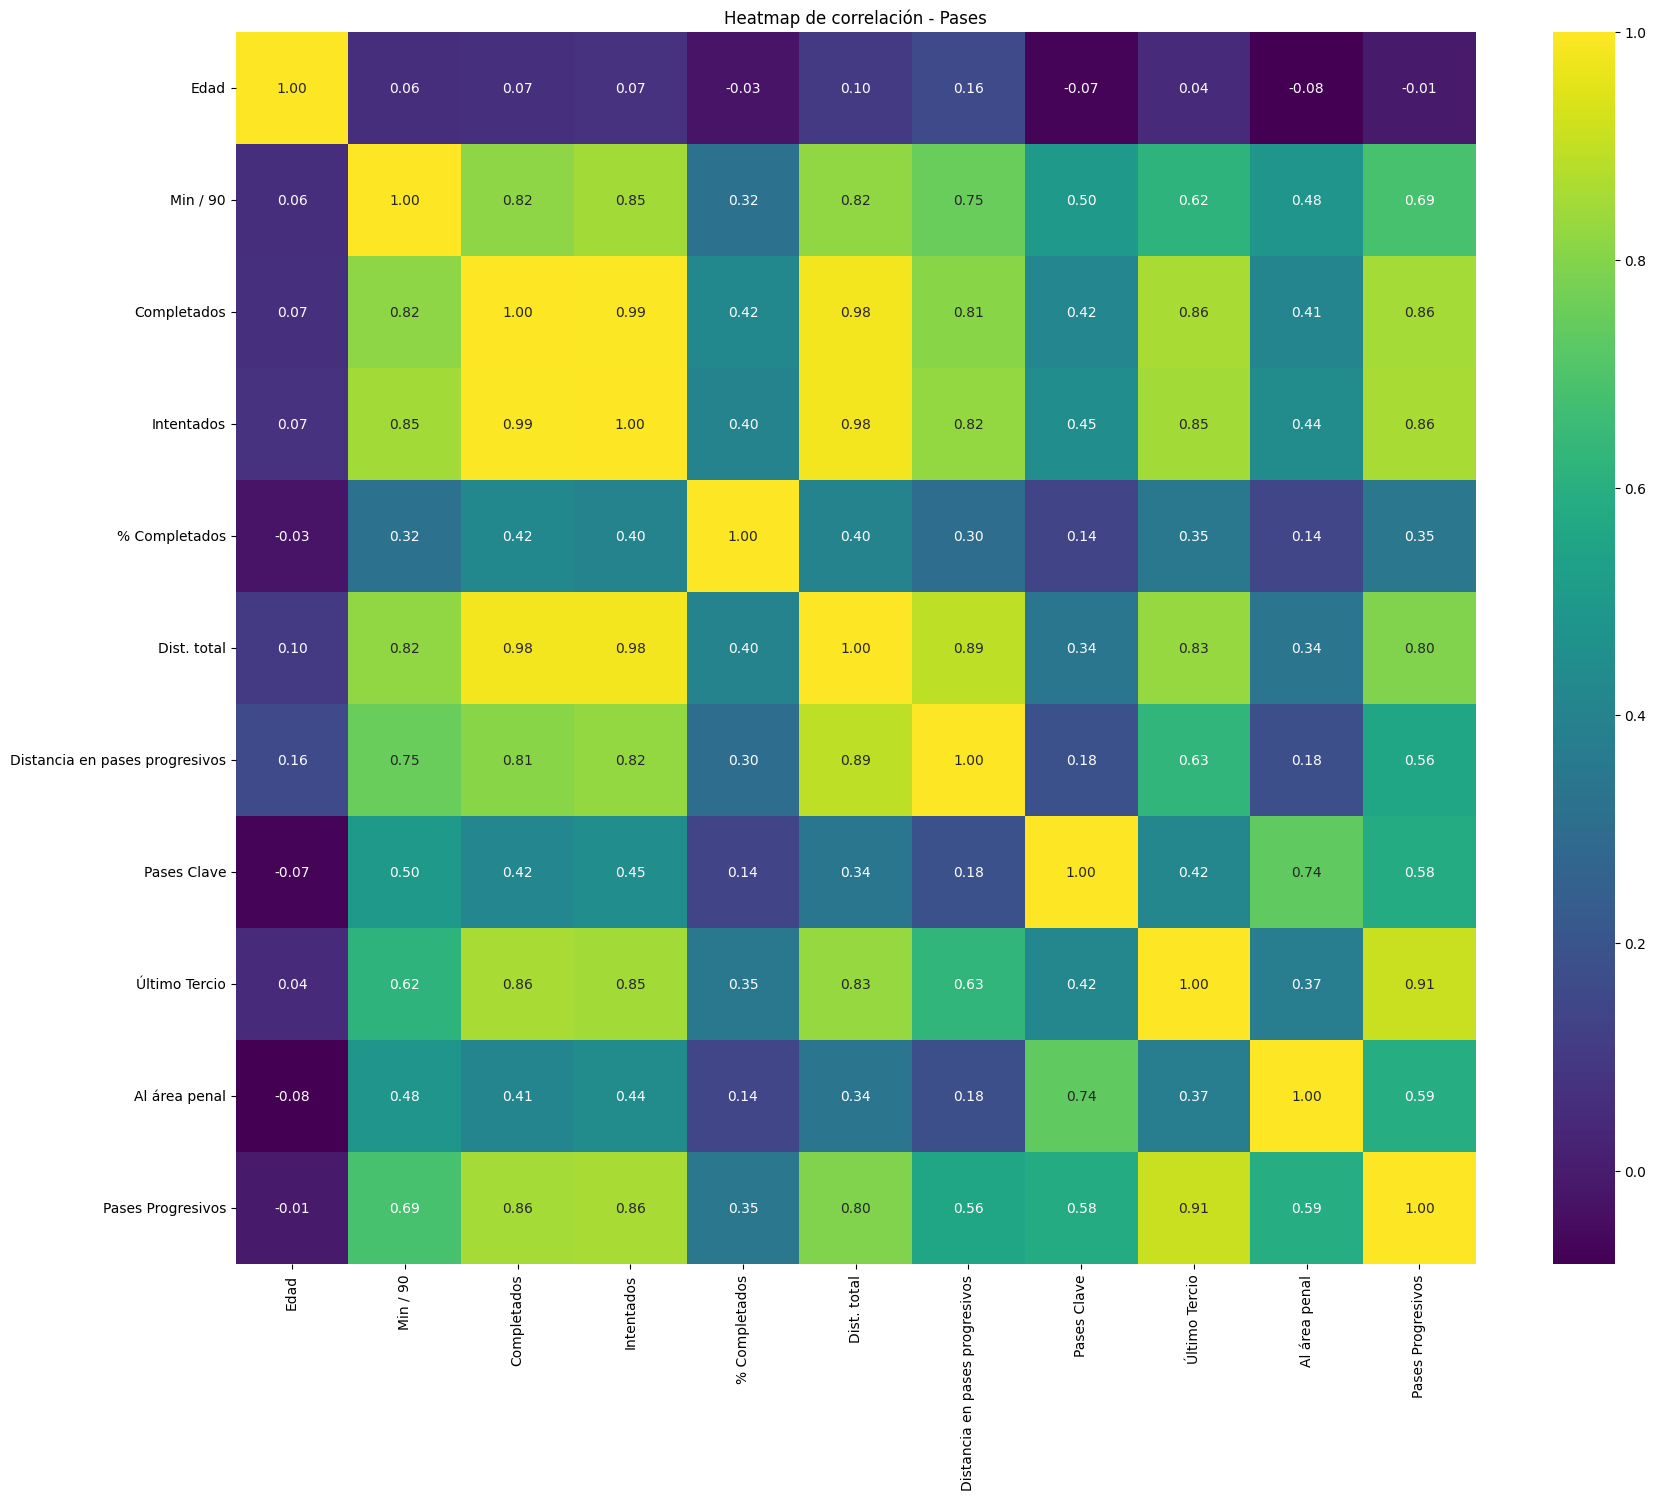

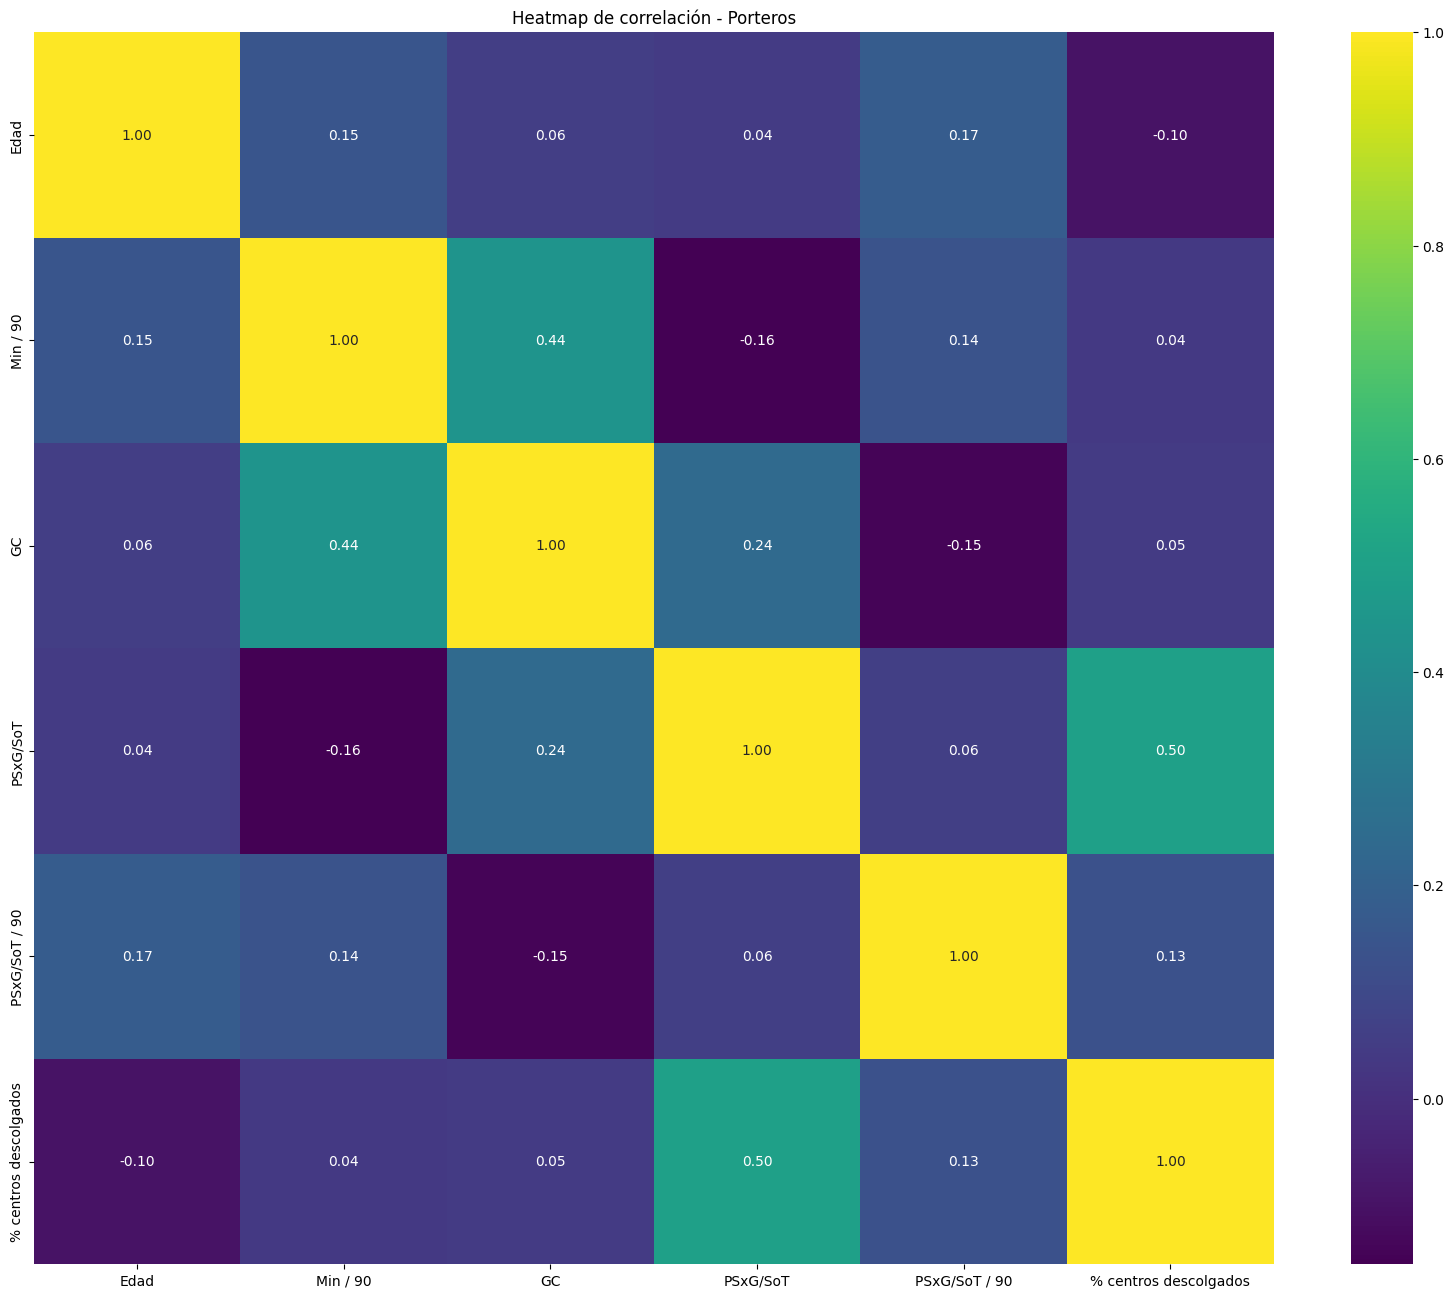

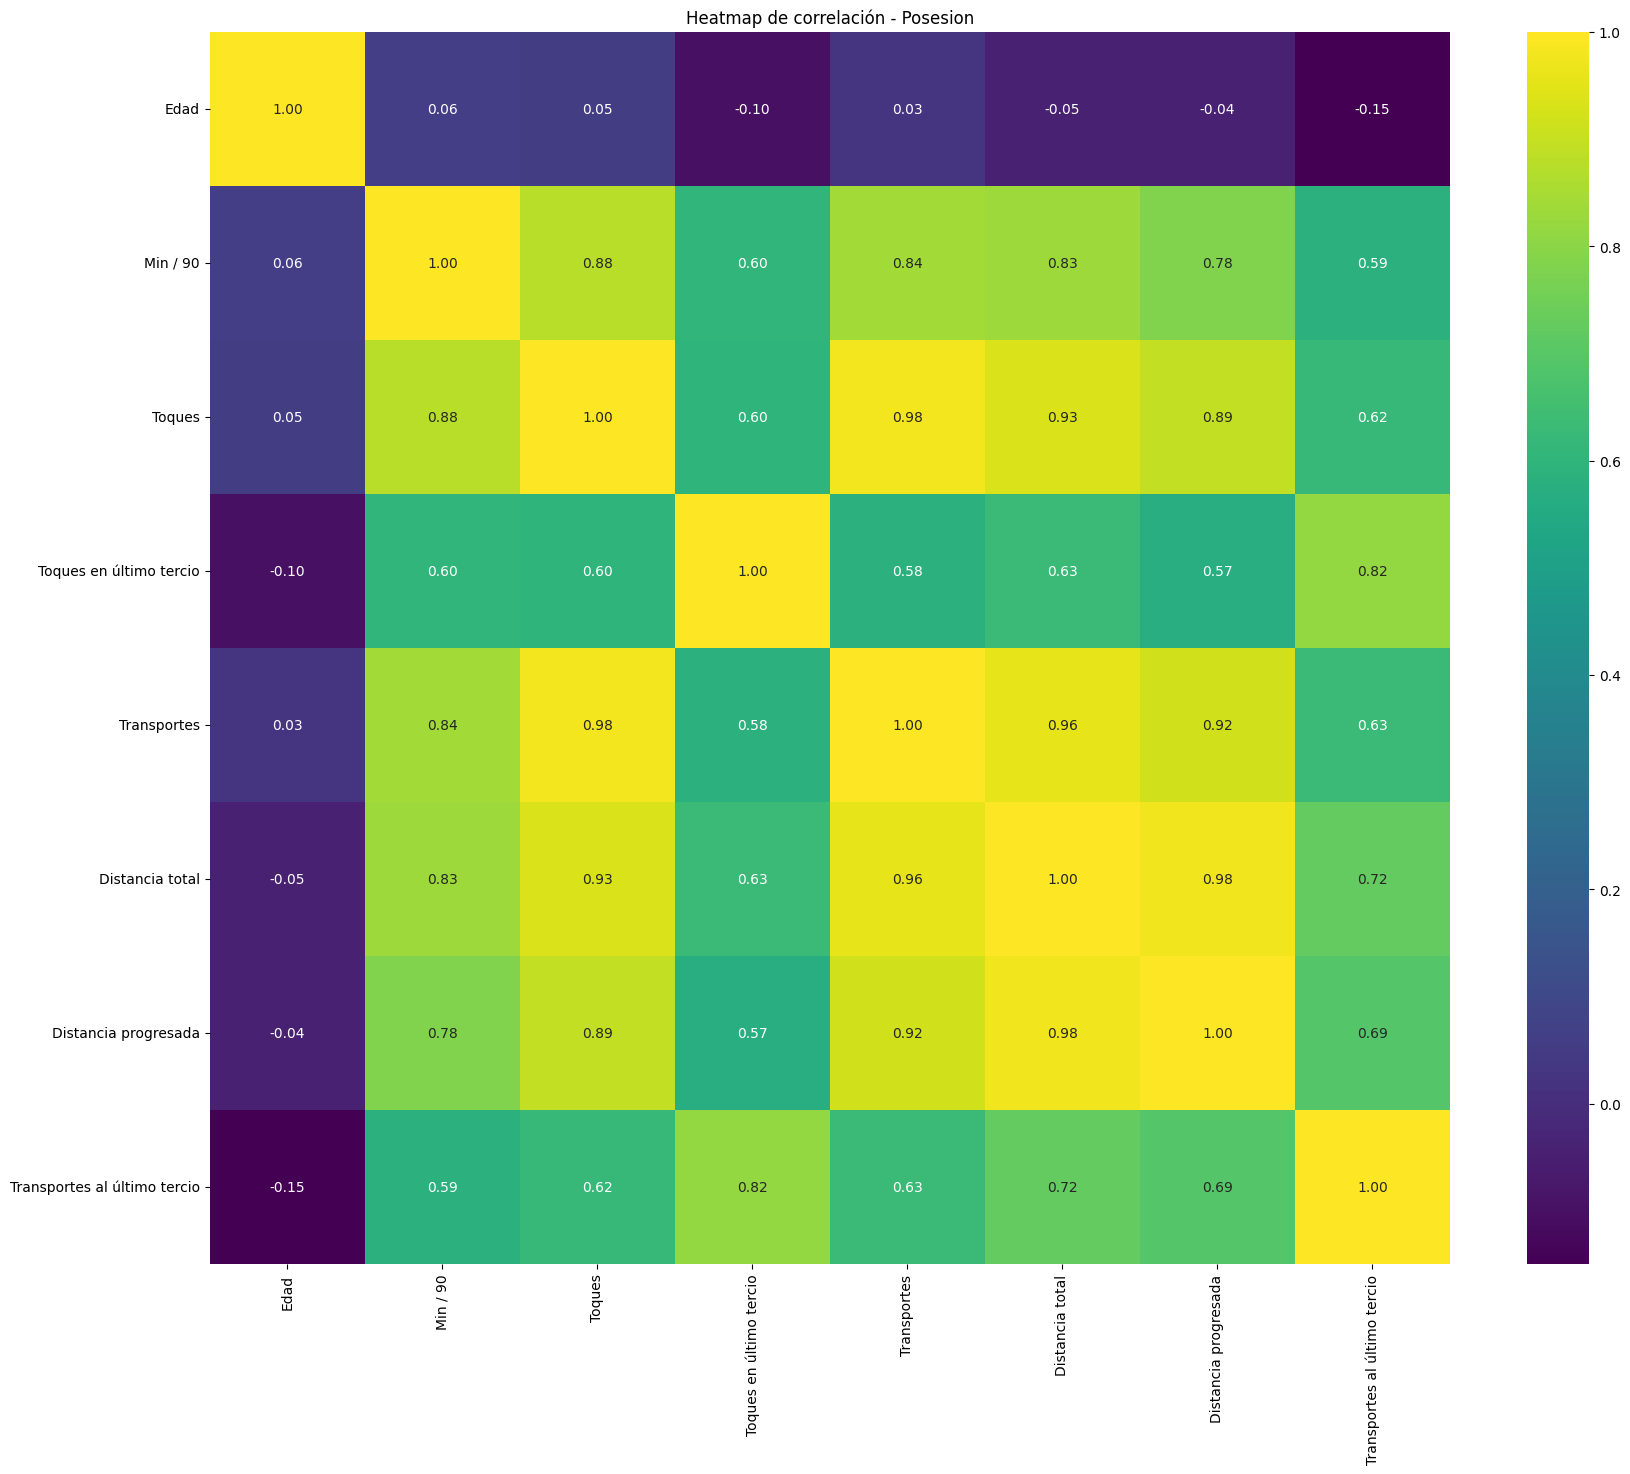

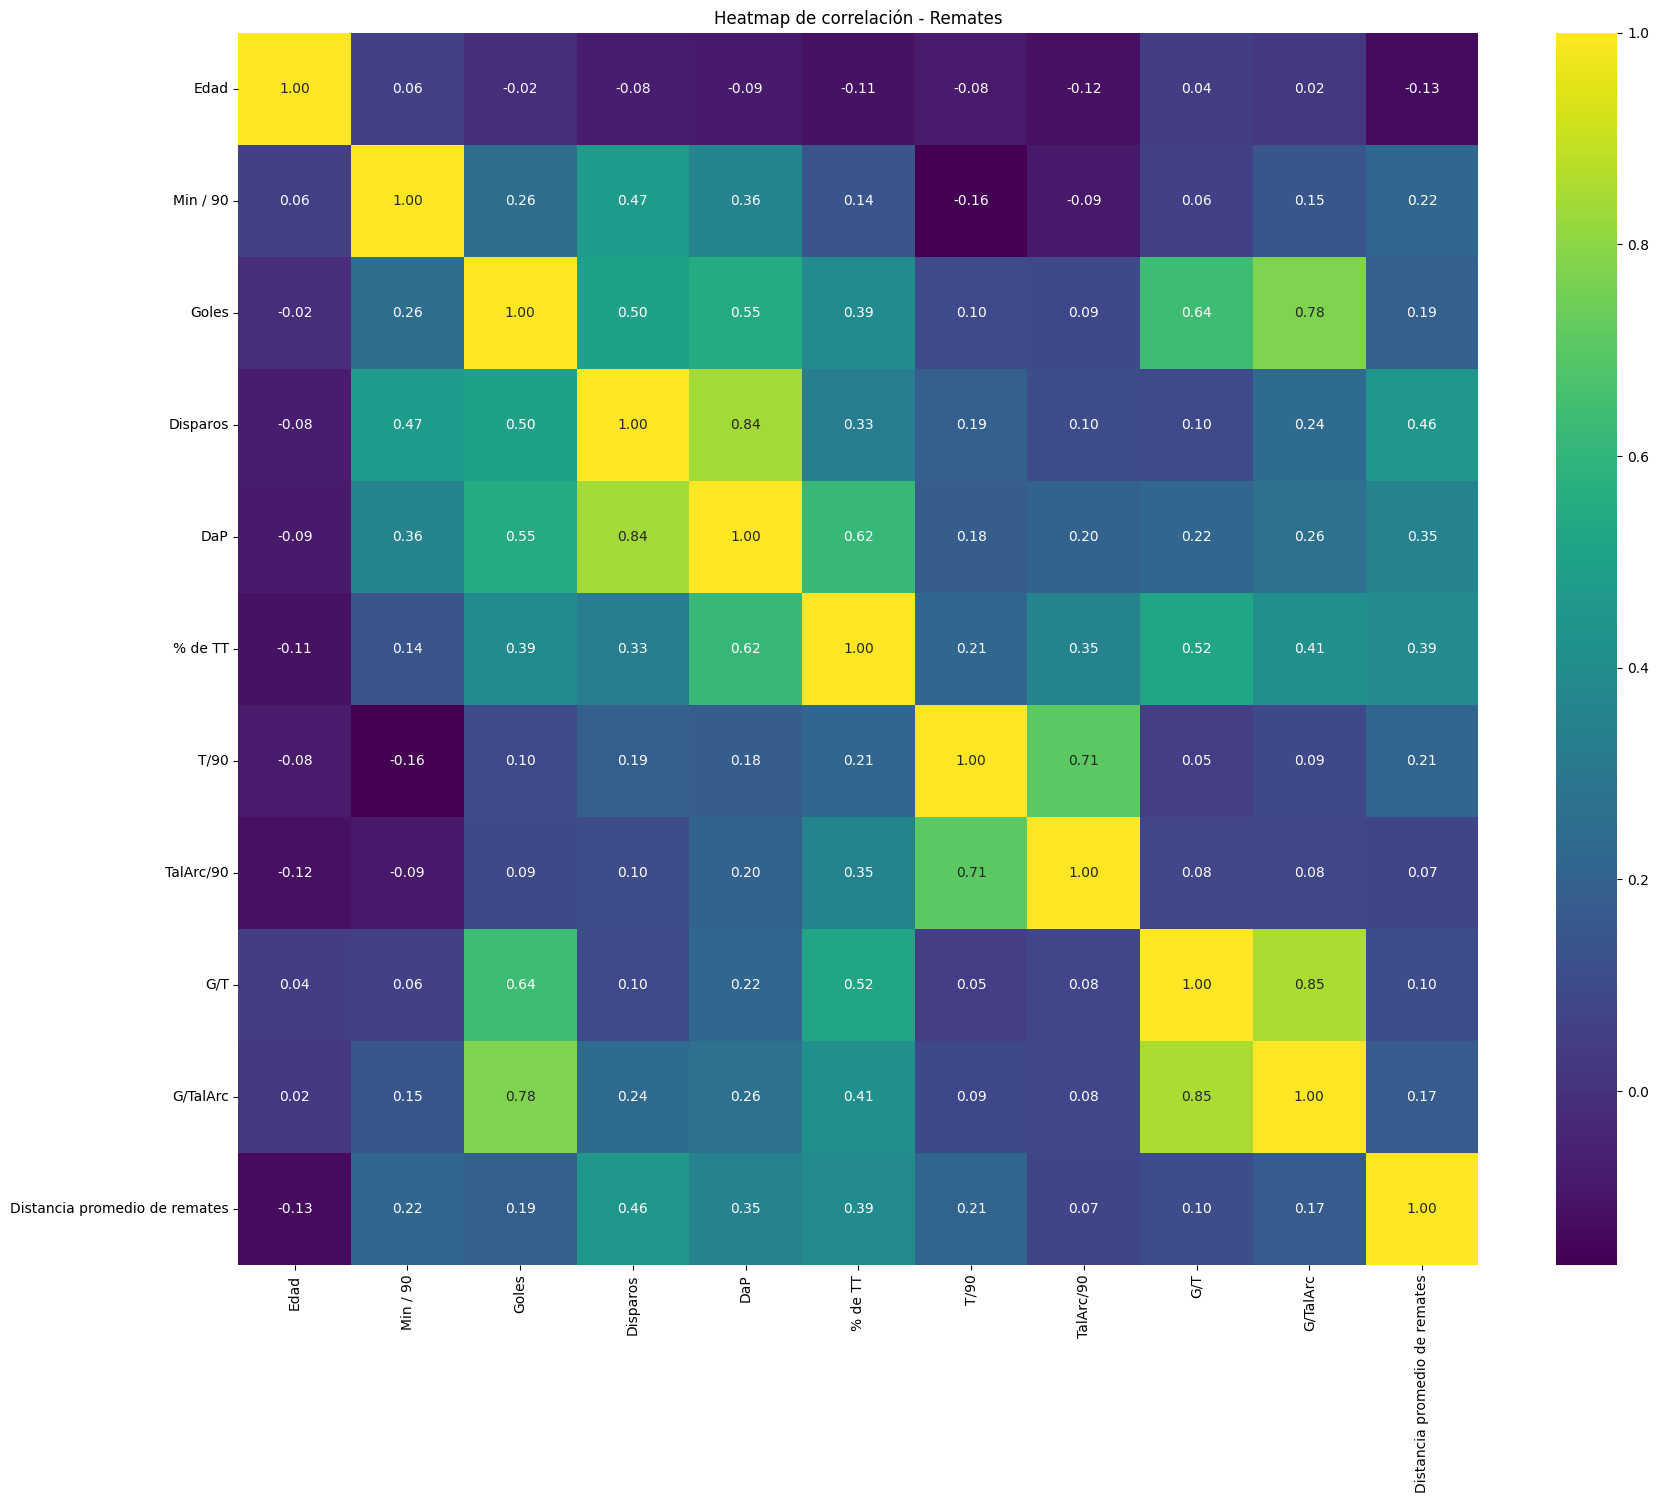

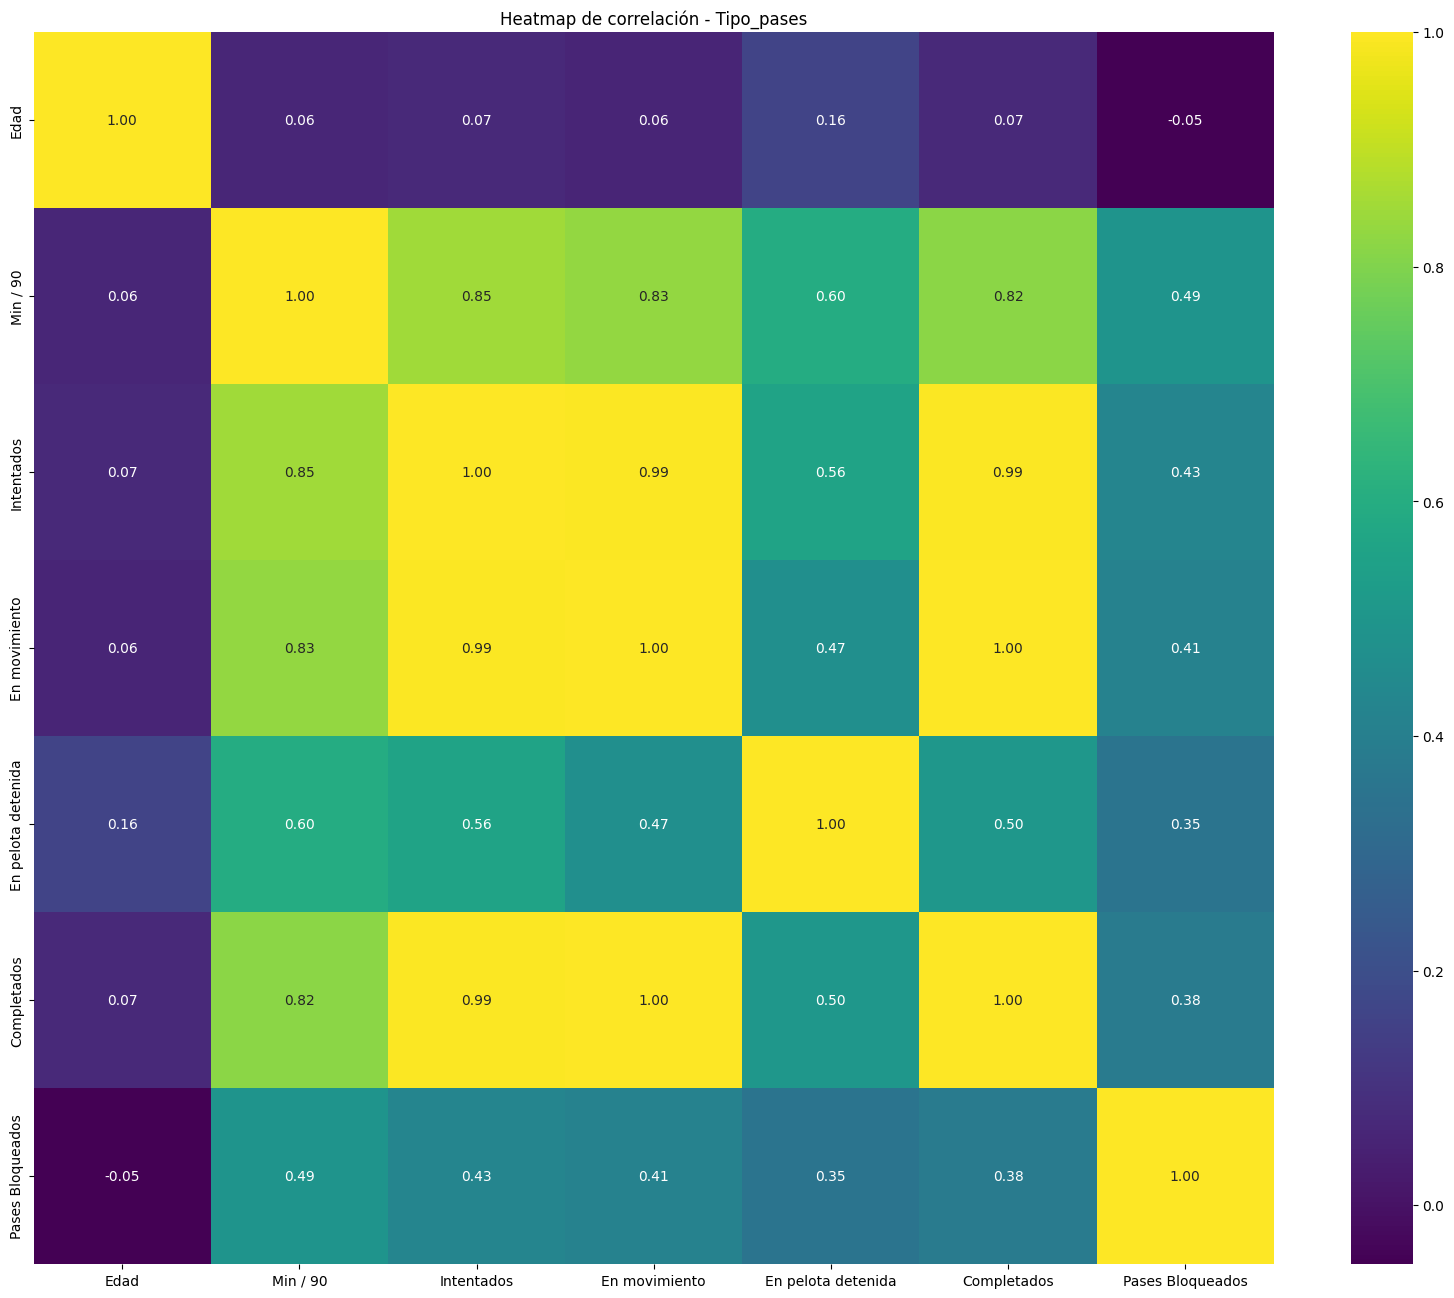

In [40]:
#Coeficientes de correlación

for key, df in dataframes_dict.items():
    try:
        # Seleccionar solo las columnas numéricas
        numeric_df = df.select_dtypes(include=[float, int])
        corr_matrix = numeric_df.corr()

        # Crear el heatmap de la matriz de correlación
        plt.figure(figsize=(20, 16))
        sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
        plt.title(f'Heatmap de correlación - {key.capitalize()}')
        plt.show()

    except Exception as e:
        print(f"Error calculando correlación para {key}: {e}")

Realizamos una segmentación de edades en tres grupos y se visualiza la distribución de estos segmentos utilizando un histograma. Distribución de segmentos de edad: jóvenes (16-23), edad adulta (24-34) y mayores de 35.

In [41]:
# Definir los rangos de bins
bins = [16, 24, 35, float('inf')]
labels = ['16-23', '24-34', '35+']
estandar['Segmento'] = pd.cut(estandar['Edad'], bins=bins, labels=labels, right=False, include_lowest=True)

# Graficar el histograma
fig = px.histogram(estandar, x='Segmento', category_orders={'Segmento': labels},
                   title='Distribución de Edad',
                   labels={'Segmento': 'Rango de Edad'})

# Ajustar el layout para que se vea mejor
fig.update_layout(
    bargap=0.2,
    xaxis_title='Rango de Edad',
    yaxis_title='Número de Jugadores'
)
fig.show()

Generamos un treemap para analizar la participación de los Sub-23 en la creación del juego ofensivo.

In [42]:
fig = px.treemap(pases[pases['Edad'] <= 23], path=['Jugador'], values='Pases Clave', title='Treemap de Jugadores Sub-23 y sus Pases Clave')
fig.show()

En esta sección, se realiza un análisis de los futbolistas menores de 23 años (Sub-23) en el DataFrame `estandar`. El objetivo es contar la cantidad de futbolistas en cada equipo y segmento de edad.


In [43]:
#Analizar los futbolistas Sub-23 por equipos
sub_23 = estandar[estandar['Edad'] <= 23]


sub_23[['Segmento', 'Equipo', 'Jugador']
   ].groupby(['Segmento', 'Equipo']).count().sort_values(by='Jugador', ascending=False).head(24)


C:\Users\Compaq\AppData\Local\Temp\ipykernel_3348\1593125852.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Jugador
Segmento Equipo              
16-23    Portugal           8
         England            8
         Ukraine            7
         Belgium            7
         Netherlands        7
         Türkiye            6
         Spain              6
         Georgia            6
         Hungary            5
         Albania            5
         Croatia            5
         Czechia            5
         Slovakia           4
         Italy              4
         Switzerland        4
         Austria            4
         Poland             4
         Germany            3
         Serbia             3
         Romania            3
         Denmark            3
         France             3
         Slovenia           2
         Scotland           1

Realizamos un análisis para clasificar a los futbolistas según sus habilidades en el DataFrame `posesion`. El proceso incluye la normalización de las puntuaciones y la clasificación en función de una puntuación total calculada. Puede utilizarse en todos los aspectos del juego.

In [44]:
#Ranking de futbolistas según sus habilidades. Ejemplo: posesión.

# Seleccionar solo las columnas numéricas (excluyendo 'Jugador')
numerical_columns = posesion.select_dtypes(include='number').columns

# Normalizar las columnas numéricas
scaler = MinMaxScaler()
posesion[numerical_columns] = scaler.fit_transform(posesion[numerical_columns])

# Sumar las puntuaciones normalizadas para cada equipo
posesion['Total Score'] = posesion[numerical_columns].sum(axis=1)

# Clasificar los equipos en función de sus puntuaciones totales
ranking = posesion[['Jugador', 'Equipo', 'Posición','Total Score']].sort_values(by='Total Score', ascending=False)

Top 15 del ranking, según los datos seleccionados en el aspecto de posesión del balón.

In [45]:
ranking.head(15)

,Jugador,Equipo,Posición,Total Score
RL,,,,
230,Aymeric Laporte,Spain,DF,5.981718
39,Jude Bellingham,England,"CC,DL",5.835989
174,Theo Hernández,France,DF,5.585327
463,Kyle Walker,England,DF,5.555990
408,John Stones,England,DF,5.529251
349,Declan Rice,England,CC,5.514339
357,Fabián Ruiz Peña,Spain,CC,5.512366
219,Toni Kroos,Germany,CC,5.411673
204,Joshua Kimmich,Germany,DF,5.369430
